###  Importing libraries

In [166]:
import pandas as pd 
import seaborn as sns
# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score


### Importing the data & exploring it 

In [167]:
# importing the data
bc_data=pd.read_csv('data.csv')

#checking the columns 
#bc_data.info()

#checking the null values 
#bc_data.isna().sum()

#target variable 
print(bc_data['diagnosis'].value_counts())

#transforimng the target variable into 1 & 0 
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M':1,'B':0})

B    357
M    212
Name: diagnosis, dtype: int64


In [168]:
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [169]:
bc_data.drop(columns={'id'},inplace=True)
bc_data.drop(columns={'Unnamed: 32'},inplace=True)

In [170]:
bc_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###  Target variable 

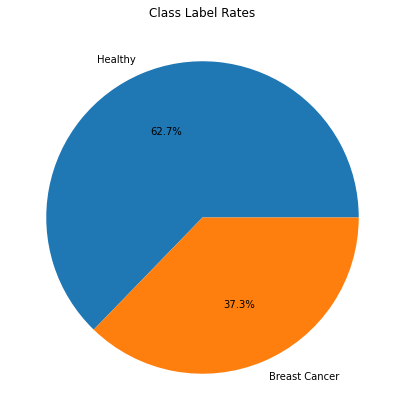

In [171]:
#target variable distribution 
plt.figure(figsize=(7,11))
plt.pie([len(bc_data['diagnosis'][bc_data['diagnosis']==0]),len(bc_data['diagnosis'][bc_data['diagnosis']==1])],
    autopct='%1.1f%%',
    labels=['Healthy','Breast Cancer'])
plt.title('Class Label Rates')
plt.show()

### Relation between features means  & the Traget variable

In [172]:
features_mean=list(data.columns[1:11])
# split dataframe into two based on diagnosis
dfM=bc_data[data['diagnosis'] ==1]
dfB=bc_data[data['diagnosis'] ==0]

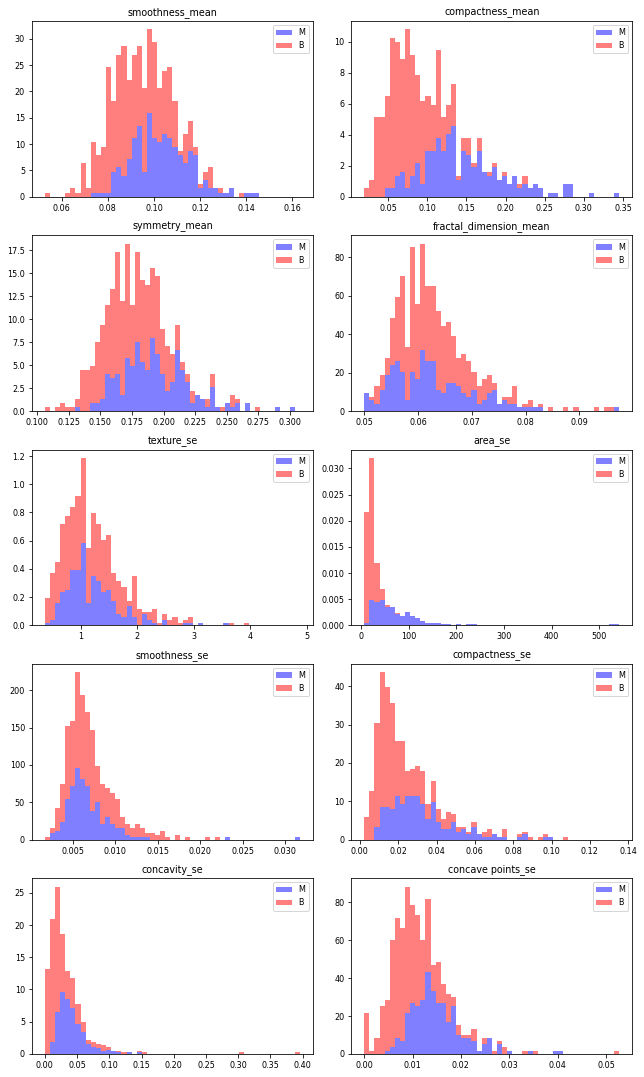

In [173]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(9,15))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(bc_data[features_mean[idx]]) - min(bc_data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(bc_data[features_mean[idx]]), max(bc_data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density=True, label=['M','B'],color=['b','r'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

###  Correlation Matrix 

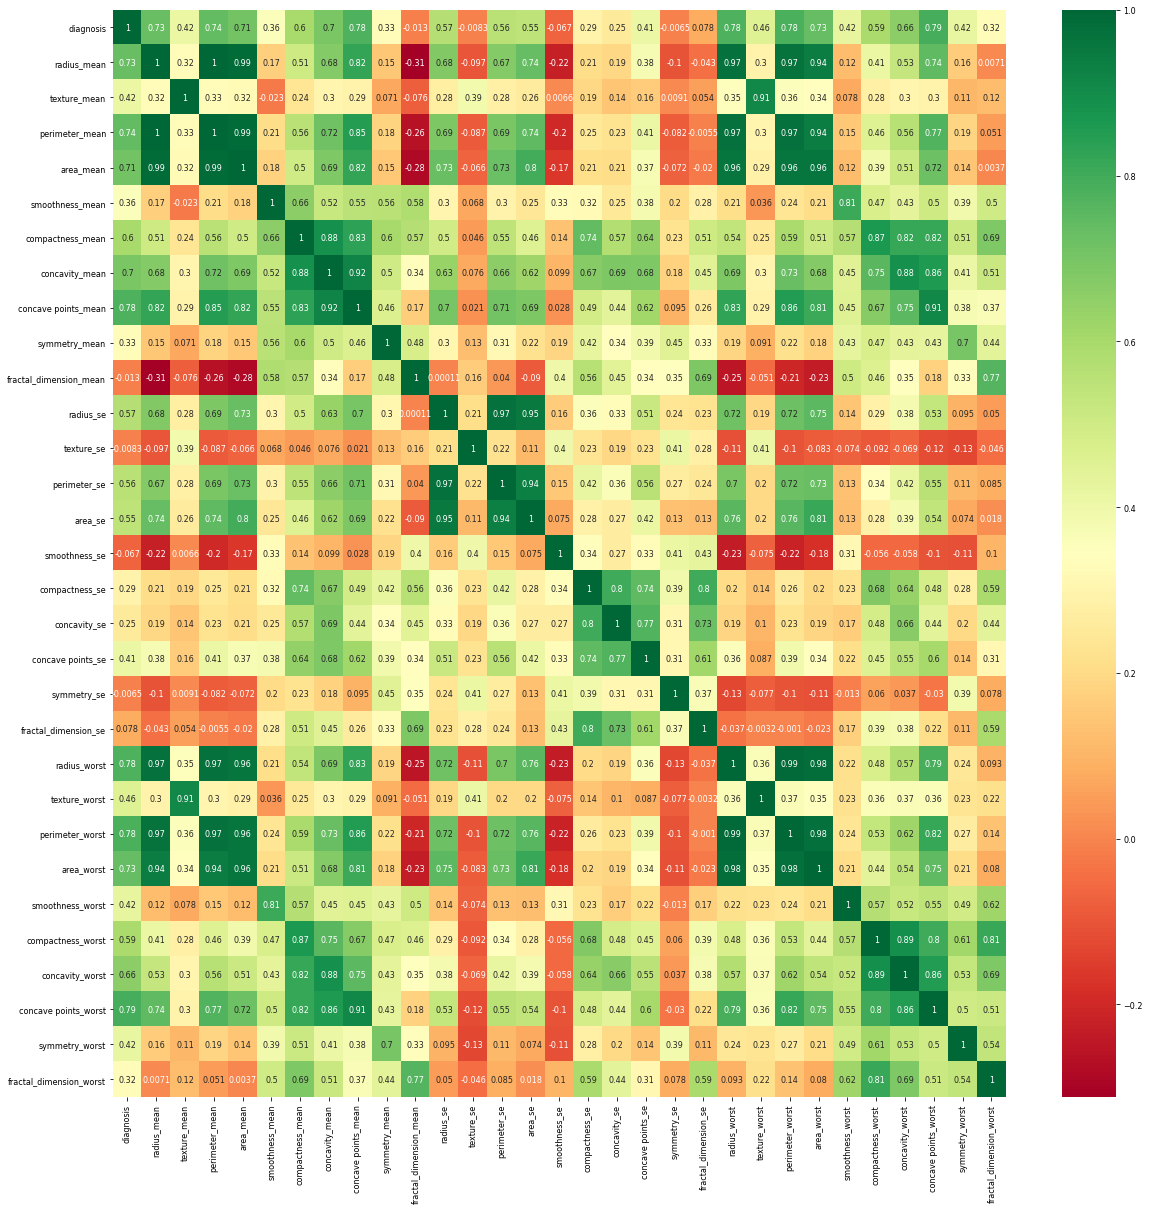

In [174]:
X = bc_data.iloc[:,1:]  #independent columns
y = bc_data.iloc[:,0]    #target column 
#get correlations of each features in dataset
corrmat = bc_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(bc_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Remove unnecessary features

In [175]:
list1= []
for i in range(len(corrmat)):
    for j in range(i):
        if corrmat.iloc[i,j] > 0.9:
            list1.append([i,j])
#list1

for i in list1:
    if len(bc_data.iloc[:,i[1]]) != 0:
        bc_data.iloc[:,i[1]] = 0
for j in bc_data.columns:
    if bc_data[j].sum() == 0:
        bc_data.drop(columns={j},inplace=True)
bc_data

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.11840,0.27760,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,0.08474,0.07864,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,0.10960,0.15990,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,0.14250,0.28390,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,0.10030,0.13280,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.11100,0.11590,0.1726,0.05623,1.2560,158.70,0.010300,0.02891,0.05198,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,0.09780,0.10340,0.1752,0.05533,2.4630,99.04,0.005769,0.02423,0.03950,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,0.08455,0.10230,0.1590,0.05648,1.0750,48.55,0.005903,0.03731,0.04730,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,0.11780,0.27700,0.2397,0.07016,1.5950,86.22,0.006522,0.06158,0.07117,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


###  Splitting into trainning and testing

In [176]:
x_train,x_test,y_train,y_test = train_test_split(bc_data.drop(columns={'diagnosis'}),bc_data['diagnosis'],test_size=0.2,random_state=32)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 20), (114, 20), (455,), (114,))

###  Scaling 

In [177]:
#1-Standart Scaler
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.fit_transform(x_test)
#2-Standart MinMaxScaler
scaler = MinMaxScaler()
x_train_mm = scaler.fit_transform(x_train)
x_test_mm = scaler.fit_transform(x_test)
#3-Standart Normalizer
scaler = Normalizer()
x_train_n = scaler.fit_transform(x_train)
x_test_n = scaler.fit_transform(x_test)
#4-Standart RobustScaler
scaler = RobustScaler()
x_train_rb = scaler.fit_transform(x_train)
x_test_rb = scaler.fit_transform(x_test)

### 1- SVM

In [178]:
from sklearn.svm import SVC
model_svm = SVC()
scores = cross_val_score(model_svm,x_train_rb,y_train,cv=10)
scores , scores.mean()

(array([0.97826087, 0.97826087, 0.97826087, 0.93478261, 0.93478261,
        0.97777778, 0.95555556, 0.97777778, 0.97777778, 0.97777778]),
 0.9671014492753625)

### 2-Naive Bayes

In [179]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
scores = cross_val_score(model_naive,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.86956522, 0.97826087, 0.91304348, 0.91304348, 0.89130435,
        0.88888889, 0.95555556, 0.91111111, 0.95555556, 0.91111111]),
 0.9187439613526569)

### 3-Decision Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
scores = cross_val_score(model_tree,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.95652174, 0.93478261, 0.97826087, 0.93478261, 0.91304348,
        0.97777778, 0.91111111, 0.88888889, 0.95555556, 1.        ]),
 0.9450724637681158)

### 4-Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
scores = cross_val_score(model_rf,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.97826087, 0.95652174, 0.97826087, 0.95652174, 0.93478261,
        0.97777778, 0.95555556, 0.93333333, 0.97777778, 1.        ]),
 0.96487922705314)

### 5-KNN 

In [182]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(model_knn,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.93478261, 0.95652174, 0.93478261, 0.91304348, 0.89130435,
        0.93333333, 0.88888889, 0.95555556, 0.93333333, 0.97777778]),
 0.9319323671497584)

### 6-Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
scores = cross_val_score(model_lr,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.97826087, 0.97826087, 0.97826087, 1.        , 0.91304348,
        0.97777778, 0.95555556, 1.        , 1.        , 0.97777778]),
 0.9758937198067633)

### 7- XGB Classifier

In [184]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb.set_config(verbosity=0)
model_xgb = xgb.XGBClassifier()
scores = cross_val_score(model_xgb,x_train_rb,y_train,cv=10)
scores, scores.mean()

(array([0.97826087, 0.93478261, 0.97826087, 0.95652174, 0.93478261,
        0.97777778, 0.95555556, 0.95555556, 0.97777778, 1.        ]),
 0.9649275362318841)

###  Predicting using the Logistic Regression 

In [185]:
model_lr = LogisticRegression()
model_lr.fit(x_train_rb,y_train)
pred_test = model_lr.predict(x_test_rb)
acc = accuracy_score(y_test.values,pred_test)

In [186]:
print('Last Accuracy of selected model is: ',(acc))

Last Accuracy of selected model is:  0.9824561403508771
